# Modelo de Ising - Estimativa de Grandezas Termodinâmicas - Parte 2  
**Aluno: João Victor Campos** 

---

Os valores de energia por spin e magnetização por spin são obtidos ao dividir o valor médio calculado para energia e magnetização
pelo número de spins da rede.

In [2]:
from  Ising_Utils import *
from typing import Tuple

\begin{align}
c_v = \frac{\beta ^2}{N} \left( \left <E^2\right> - \left<E\right>^2  \right) \\
\chi = \frac{\beta}{N} \left( \left <M^2\right> - \left<M\right>^2  \right)
\end{align}

In [3]:
@jit(nopython=True)
def rms(Vec):
    N = len(Vec)
    
    Vec_mean = np.mean(Vec)
    Vec_square_mean = np.mean(Vec*Vec)

    # M_mean = np.mean(Energy_Vec)
    # M_square_mean = np.mean(Mag_vec* Mag_vec) 
    
    root_ms =  (Vec_square_mean - Vec_mean**2)

    return root_ms

In [4]:
# Parâmetero Globais
TEMPERATURAS = [2.0, 2.1 , 2.2, 2.3 , 2.4, 2.5 , 2.6 , 2.7 , 2.8, 2.9, 3.0]
# TEMPERATURAS = [2.0, 2.2, 2.4, 2.6 ,2.8, 3.0]

NUM_CAIXAS = 10
L_REDE = [20, 30, 40, 50]
# L_REDE = [18]


CV_CONTAINTER = []
CV_ERROS = []

CHI_CONTAINER = []
CHI_ERROS = []

ENERGY_CONTAINER = []
ENERGY_ERROS = []

MAG_CONTAINER = []
MAG_ERROS = []

MONTE_CARLO_STEPS = 110_000


In [5]:
for L in L_REDE:
    print("-" * 100)
    print(f"Tamahno da rede = {L}")
    for T in TEMPERATURAS:
        print(f"\tTemperatura = {T} ")
        Rede = SpinLattice( L=L, T=T, spins=random_config(L*L) )
        ex = create_exp_dict(Rede.beta)

        ener, mag = get_ener_mag(spins= Rede.spins, viz=Rede.get_viz())

        energias = np.empty(MONTE_CARLO_STEPS)
        mags = np.empty(MONTE_CARLO_STEPS)

        for i in range(MONTE_CARLO_STEPS):
            s, ener, mag = monte_carlo_step(S=Rede.spins, viz=Rede.get_viz(),
                                            ex=ex,ener=ener, mag=mag)
            energias[i] = ener
            mags[i] = mag       # Slice dentro do mesmo tamanho L    
        energias = energias[10_000:]
        mags = mags[10_000:]

        # Armazenar os valores de cada caixa
        cv_is = np.empty(NUM_CAIXAS)
        chi_is = np.empty(NUM_CAIXAS)
    
        mag_is = np.empty(NUM_CAIXAS)
        E_is = np.empty(NUM_CAIXAS)
        
        m = len(energias) / NUM_CAIXAS
        
        # Metodo das Caixas
        for k in range(NUM_CAIXAS):
            
            E_i = energias[ int(m * (k)) : int( m * (k+1) )]
            mag_i = mags[ int(m * (k)) : int( m * (k+1) ) ] 

            
            # adiciona aos array
            cv_is[k] = (Rede.beta**2 / m) * rms(E_i)
            chi_is[k] = (Rede.beta / m) * rms(mag_i)
            E_is[k] = np.sum(E_i) / m
            mag_is[k] = abs( sum( mags[int(m * (k)): int(m * (k+1))] ) ) / m
        
        # A adicionar ao CONTAINER
        CV_medio, CV_erro = np.mean(cv_is), np.std(cv_is)
        CHI_medio, CHI_erro = np.mean(chi_is), np.std(chi_is)
        E_medio, E_erro = np.mean(E_is) , np.std(E_is)
        MAG_medio, MAG_erro = np.mean(mag_is) , np.std(mag_is)

        CV_CONTAINTER.append(CV_medio)
        CV_ERROS.append(CV_erro)

        CHI_CONTAINER.append(CHI_medio)
        CHI_ERROS.append(CHI_erro)

        ENERGY_CONTAINER.append(E_medio)
        ENERGY_ERROS.append(E_erro)

        MAG_CONTAINER.append(MAG_medio)
        MAG_ERROS.append(MAG_erro)

print("RODOU")


    



----------------------------------------------------------------------------------------------------
Tamahno da rede = 20
	Temperatura = 2.0 
	Temperatura = 2.1 
	Temperatura = 2.2 
	Temperatura = 2.3 
	Temperatura = 2.4 
	Temperatura = 2.5 
	Temperatura = 2.6 
	Temperatura = 2.7 
	Temperatura = 2.8 
	Temperatura = 2.9 
	Temperatura = 3.0 
----------------------------------------------------------------------------------------------------
Tamahno da rede = 30
	Temperatura = 2.0 
	Temperatura = 2.1 
	Temperatura = 2.2 
	Temperatura = 2.3 
	Temperatura = 2.4 
	Temperatura = 2.5 
	Temperatura = 2.6 
	Temperatura = 2.7 
	Temperatura = 2.8 
	Temperatura = 2.9 
	Temperatura = 3.0 
----------------------------------------------------------------------------------------------------
Tamahno da rede = 40
	Temperatura = 2.0 
	Temperatura = 2.1 
	Temperatura = 2.2 
	Temperatura = 2.3 
	Temperatura = 2.4 
	Temperatura = 2.5 
	Temperatura = 2.6 
	Temperatura = 2.7 
	Temperatura = 2.8 
	Temperatura =

In [6]:
num_redes = len(L_REDE)

# Calor Especifico
Cv_rede = np.array_split(CV_CONTAINTER, num_redes)
Cv_erro = np.array_split(CV_ERROS, num_redes)
# Susceptibilidade
Chi_rede = np.array_split(CHI_CONTAINER, num_redes)
Chi_erro = np.array_split(CHI_ERROS, num_redes)
# Magnetizacao
Mag_rede = np.array_split(MAG_CONTAINER, num_redes)
Mag_erro = np.array_split(MAG_ERROS, num_redes)
# Energia por spin
Energia_rede = np.array_split(ENERGY_CONTAINER, num_redes)
Energia_erro = np.array_split(ENERGY_ERROS, num_redes)


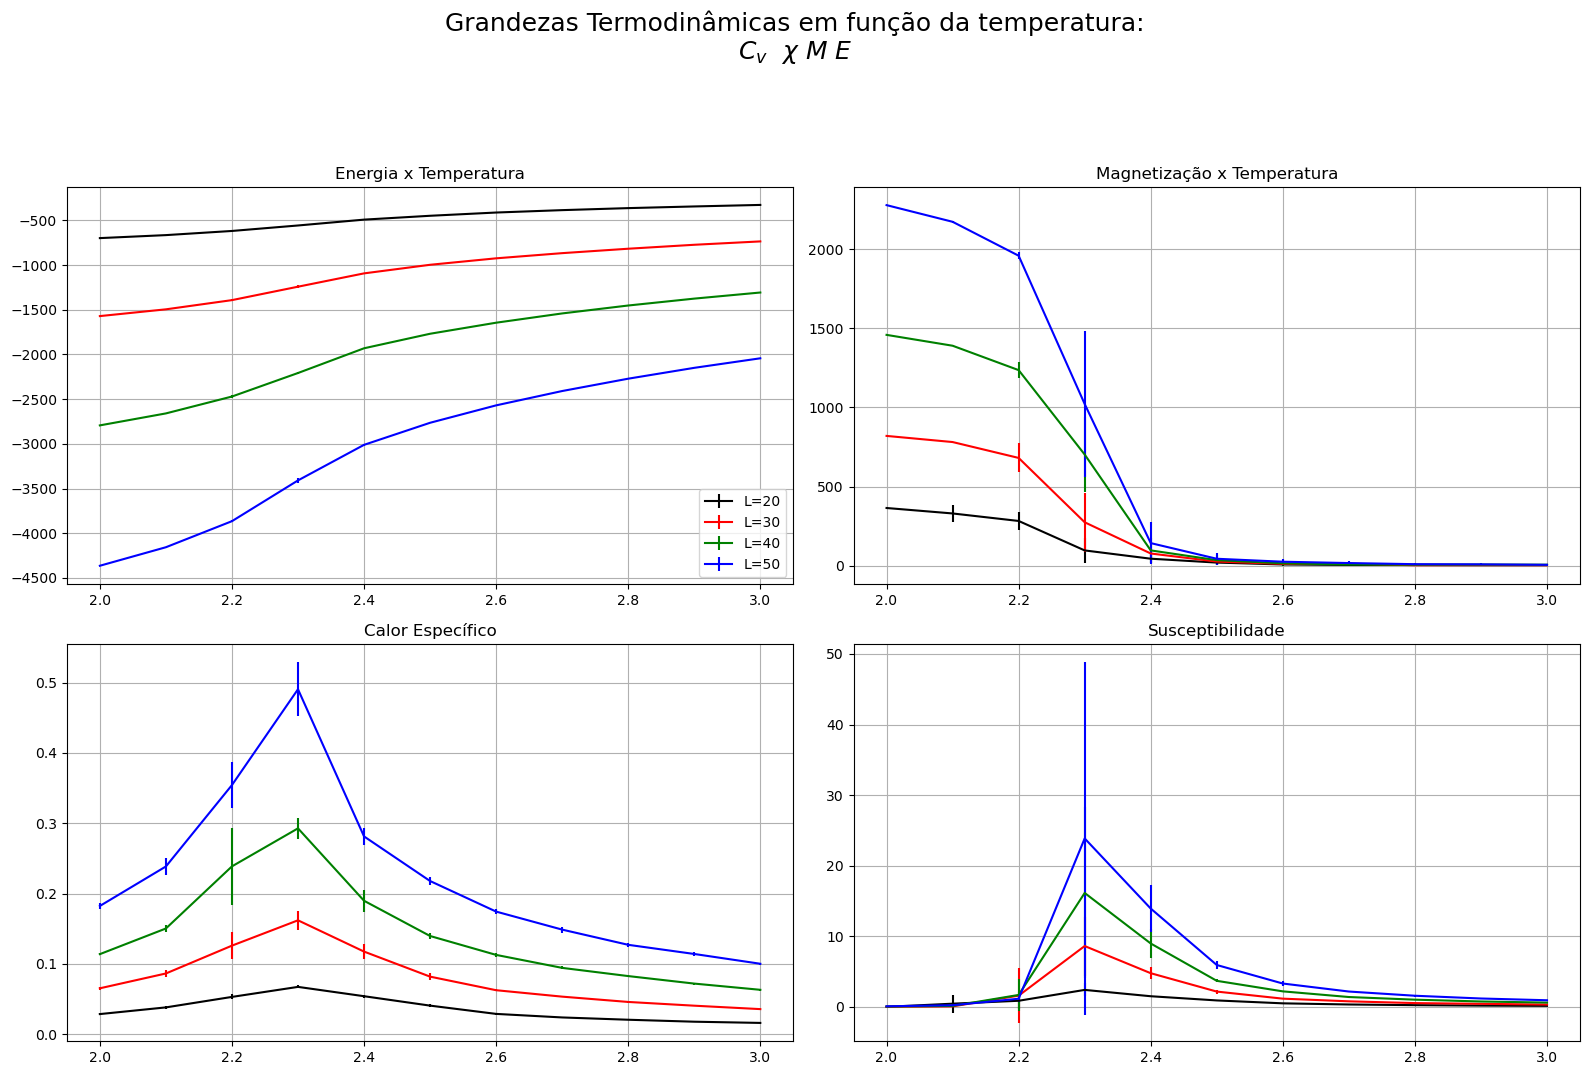

In [7]:
fig, (ax_up, ax_down) = plt.subplots(2, 2, figsize=(16,10))
fig.suptitle('Grandezas Termodinâmicas em função da temperatura:\n' + r"$C_v$  $\chi$ $M$ $E$", y=1.07, size=18);

c = ["black", "red", "green", "blue"]

ax_up[0].set_title("Energia x Temperatura") ; ax_up[0].grid() 
ax_up[1].set_title("Magnetização x Temperatura") ;  ax_up[1].grid() 
ax_down[0].set_title("Calor Específico") ; ax_down[0].grid() 
ax_down[1].set_title("Susceptibilidade") ; ax_down[1].grid()

# Plot energias
for i in range(num_redes):
    ax_up[0].errorbar(TEMPERATURAS, Energia_rede[i], Energia_erro[i], color=c[i], label=f"L={L_REDE[i]}")
    ax_up[0].legend()

# Plot Mag
for i in range(num_redes):
    ax_up[1].errorbar(TEMPERATURAS, Mag_rede[i], Mag_erro[i], color=c[i], label=f"L={L_REDE[i]}")   

# Plot Calor Especifico
for i in range(num_redes):
    ax_down[0].errorbar(TEMPERATURAS, Cv_rede[i], Cv_erro[i], color=c[i], label=f"L={L_REDE[i]}")     

# Plot Susceptibilidade
for i in range(num_redes):
    ax_down[1].errorbar(TEMPERATURAS, Chi_rede[i], Chi_erro[i], color=c[i], label=f"L={L_REDE[i]}")   




fig.tight_layout()

## Respostas às perguntas da atividade

### 1 - Quais critérios você utilizou para escolher os valores dos parâmetros descritos acima?  

**Resposta:**  
Já havia feito uma atividade semelhante, então sabia quais tamanhos de rede seriam interessantes trabalhar, bem como a faixa de temperatura.

### 2 -  Descreva o comportamento observado para as principais grandezas termodinâmicas – Energia por spin, Magnetização por spin, calor específico e susceptibilidade magnética – em função da temperatura. Ou seja, ao variar a temperatura, o que acontece com o valor destas grandezas? Quais são os limites para baixas e altas temperaturas? Há algum pico ou vale? O comportamento está em acordo com o que você esperava?

**Resposta:**  
A energia por spin média é maior (menos negativa) para tamanhos de redes maiores. A magnetização por spin vai a 0 para temperaturas muito altas, isso deve significar a perda do caráter ferromagnético após o ponto de Curie. O calor específico para rede menores é também menor, aumenta até determinada temperatura, satura, e depois diminui. O comportamento da susceptibilidade é semelhante.  

### 3 - Ao variar o tamanho do sistema, como as curvas destas grandezas em função da temperatura se modifica? Há algum intervalo de temperaturas no qual as grandezas são independentes do tamanho do sistema? Em regiões onde há variação com o tamanho do sistema, como a grandeza é modificada quando $𝐿$ aumenta?

**Resposta:**
A partir do $T > 2.6$,  $C_v, \chi, \mathcal{M}$ são independentes do tamanho do sistema e vão um valor constante (ou nulo).  

### 4 - Como é o comportamento dos erros estatísticos à medida que a temperatura varia? Tem algum valor de temperatura em torno do qual os erros são maiores? Você enxerga algum motivo para isso? Os erros estatísticos dependem do tamanho do sistema? Como?  

**Resposta**:  
 O erro estatístico é tanto maior quanto maior o sistema, bem como quanto mais próximo da temperatura de transição de fase que ocorre por volta de $T=2.3$.

### 5 - Com base no comportamento encontrado, identifique possíveis fases do sistema, descrevendo as principais características das fases encontradas.  

**Resposta**:
Muito provavelmente uma fase ferromagnética com um valor de magnetização não nulo e um fase paramagnética após a transição de fase.

### 6 - Estime, utilizando os dados das suas simulações, a temperatura de transição de fase do sistema no limite termodinâmico, i.e., para o limite em que o tamanho do sistema é infinito.  

**Resposta:**  

Com o tamanho do sistema indo para infinito, a curva estreitaria em valores próximos a $T=2.3$ onde haveria uma descontinuidade das grandezas termodinâmicas.

